<a href="https://colab.research.google.com/github/angiemelany/Analisis_datos/blob/main/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 2**
## Integrantes: Angie Corral; Catalina Oliveros
##Profesora: Vivian Fierro
## Asignatura: Análisis de Datos

## Selección del dataset

Para el presente análisis se seleccionó un dataset de carácter socioeconómico que permite evaluar el nivel de desarrollo y bienestar de distintos países. Esta base de datos integra indicadores críticos —como el PIB per cápita, la inflación, la mortalidad infantil y los flujos de comercio exterior— ofreciendo una visión integral de la situación económica y la calidad de vida de cada nación.

Aunque el origen de los datos se remonta a un caso práctico para la asignación de recursos humanitarios, su relevancia trasciende al ámbito económico estratégico, siendo una herramienta fundamental para analizar la estabilidad, el riesgo y el potencial de crecimiento de los mercados."


## Variables:

* country: nombre del país.

* child_mort: cuántos niños menores de 5 años fallecen por cada 1.000 nacimientos.

* exports: cuánto exporta el país, como porcentaje del PIB per cápita.

* health: cuánto se gasta en salud, también como porcentaje del PIB per cápita.

* imports: nivel de importaciones del país.

* income: ingreso promedio por persona.

* inflation: variación anual del PIB, usada como medida de inflación.

* life_expec: esperanza de vida.

* total_fer: cuántos hijos tiene en promedio una mujer.

* gdpp: PIB per cápita.


## URL del dataset en GitHub

URL cruda (.csv):
https://raw.githubusercontent.com/catalinaoliveros1431-cpu/Analisis_datos/refs/heads/main/Country-data.csv

In [ ]:
# =============================
# 2. IMPORTACIÓN DEL DATASET
# =============================

# URL RAW del dataset
url <- "https://raw.githubusercontent.com/catalinaoliveros1431-cpu/Analisis_datos/refs/heads/main/Country-data.csv"

# Importar dataset
country <- read.csv(url)

# Exploración inicial
head(country)
str(country)
names(country)
dim(country)      # cantidad de filas y columnas
sapply(country, class)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
6,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


'data.frame':	167 obs. of  10 variables:
 $ country   : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ child_mort: num  90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num  10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num  7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num  44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : int  1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num  9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num  56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num  5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : int  553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...


[1] "country"    "child_mort" "exports"    "health"     "imports"   
 [6] "income"     "inflation"  "life_expec" "total_fer"  "gdpp"

[1] 167  10

country  child_mort     exports      health     imports      income 
"character"   "numeric"   "numeric"   "numeric"   "numeric"   "integer" 
  inflation  life_expec   total_fer        gdpp 
  "numeric"   "numeric"   "numeric"   "integer"

El dataset se importó directamente desde la URL cruda de GitHub, lo que facilitó su carga en R Colab y aseguró la reproducibilidad del análisis. Tras la importación, revisamos su estructura con funciones básicas para confirmar que los datos estuvieran correctos.

El archivo contiene 167 países y 10 variables, donde solo country es de tipo carácter y todas las demás son numéricas, lo que permite aplicar sin problemas métodos como PCA y K-Means. Las variables corresponden a indicadores socioeconómicos relevantes —como mortalidad infantil, ingresos, inflación y esperanza de vida— y desde la inspección inicial ya se evidencian diferencias importantes entre los países.

##Objetivo del análisis

El objetivo de esta etapa fue preparar y comprender la base de datos para luego identificar grupos de países con características similares mediante PCA y K-Means, transformando los indicadores numéricos en información útil para comparar perfiles socioeconómicos.

In [ ]:
# ==========================================
# 3. PROCESO DE LIMPIEZA Y CORRECCIÓN DE DATOS
# ==========================================

# Copia de trabajo
df <- country

# -----------------------------
# 3.1 Eliminar duplicados
# -----------------------------
nrow(df)        # revisar cantidad inicial
df <- df[!duplicated(df), ]
nrow(df)        # revisar cantidad final

# -----------------------------
# 3.2 Corrección de etiquetas/categorías
# (Este dataset no tiene variables categóricas relevantes)
# -----------------------------
# Revisar valores únicos de la única variable categórica: country
length(unique(df$country))

# -----------------------------
# 3.3 Tratamiento de datos perdidos (NA)
# -----------------------------
colSums(is.na(df))

# En caso de encontrar NA, se podría usar:
# df <- na.omit(df)
# o imputación según corresponda

# -----------------------------
# 3.4 Conversión de categóricas
# country es nominal → no se usa en PCA / K-Means
# Se convierte a factor por orden, pero se eliminará luego para el modelamiento
# -----------------------------
df$country <- as.factor(df$country)

# -----------------------------
# 3.5 Binarizaciones (solo si corresponde)
# Aquí NO corresponde porque todas las variables cuantitativas
# ya están en formato numérico adecuado.
# -----------------------------

# -----------------------------
# 3.6 Resultado final
# -----------------------------
str(df)
summary(df)


[1] 167

[1] 167

[1] 167

country child_mort    exports     health    imports     income  inflation 
         0          0          0          0          0          0          0 
life_expec  total_fer       gdpp 
         0          0          0

'data.frame':	167 obs. of  10 variables:
 $ country   : Factor w/ 167 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ child_mort: num  90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num  10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num  7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num  44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : int  1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num  9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num  56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num  5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : int  553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...


                country      child_mort        exports            health      
 Afghanistan        :  1   Min.   :  2.60   Min.   :  0.109   Min.   : 1.810  
 Albania            :  1   1st Qu.:  8.25   1st Qu.: 23.800   1st Qu.: 4.920  
 Algeria            :  1   Median : 19.30   Median : 35.000   Median : 6.320  
 Angola             :  1   Mean   : 38.27   Mean   : 41.109   Mean   : 6.816  
 Antigua and Barbuda:  1   3rd Qu.: 62.10   3rd Qu.: 51.350   3rd Qu.: 8.600  
 Argentina          :  1   Max.   :208.00   Max.   :200.000   Max.   :17.900  
 (Other)            :161                                                      
    imports             income         inflation         life_expec   
 Min.   :  0.0659   Min.   :   609   Min.   : -4.210   Min.   :32.10  
 1st Qu.: 30.2000   1st Qu.:  3355   1st Qu.:  1.810   1st Qu.:65.30  
 Median : 43.3000   Median :  9960   Median :  5.390   Median :73.10  
 Mean   : 46.8902   Mean   : 17145   Mean   :  7.782   Mean   :70.56  
 3rd Qu.: 58.

## Proceso de limpieza y corrección de datos


### 3.1 Eliminación de duplicados

Se verificó la existencia de filas duplicadas comparando el número de observaciones antes y después del filtrado. Ambas cantidades coincidieron (167 filas), lo que confirma que el dataset no contenía duplicados.

### 3.2 Corrección de etiquetas o categorías

La única variable categórica presente es country. Al revisar sus valores únicos se identificaron 167 países distintos, lo que indica que no había inconsistencias en las etiquetas ni nombres repetidos.

### 3.3 Tratamiento de datos perdidos (NA)

Se evaluó la presencia de valores NA en todas las columnas. Ninguna variable presentó datos faltantes, por lo que no fue necesario aplicar imputaciones ni eliminar registros.

### 3.4 Conversión de categóricas

La variable country fue convertida al tipo factor para mantener la organización del dataset. No se utiliza en el PCA ni en el clustering, ya que ambos métodos requieren variables numéricas.

### 3.5 Binarizaciones

No fue necesario aplicar binarizaciones, dado que las variables numéricas ya estaban en un formato adecuado para los análisis posteriores.

### 3.6 Resultado final del proceso

Al revisar la estructura final del dataset (con str() y summary()), confirmamos que el dataset queda con 167 observaciones y 10 variables y que todas las variables numéricas presentan rangos y distribuciones coherentes con indicadores socioeconómicos reales.

Por lo tanto, no existen datos faltantes ni inconsistencias en los tipos de datos.

In [ ]:
# =====================================
# 4. PREPARACIÓN DE DATOS Y ESTANDARIZACIÓN
# =====================================

# 4.1 Seleccionar solo variables numéricas
# (country es factor, no se usa en PCA ni K-Means)

df_num <- df[, c("child_mort", "exports", "health", "imports",
                 "income", "inflation", "life_expec",
                 "total_fer", "gdpp")]

# Revisar estructura de las variables numéricas
str(df_num)

# 4.2 Aplicar estandarización Z-score
# Método obligatorio antes de PCA y K-Means según clases
df_scaled <- scale(df_num)

# 4.3 Convertir el resultado a data frame
df_scaled <- as.data.frame(df_scaled)

# 4.4 Revisar el dataset estandarizado
head(df_scaled)
summary(df_scaled)


'data.frame':	167 obs. of  9 variables:
 $ child_mort: num  90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num  10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num  7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num  44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : int  1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num  9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num  56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num  5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : int  553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.2876597,-1.13486665,0.27825140,-0.08220771,-0.80582187,0.1568645,-1.6142372,1.89717646,-0.67714308
2,-0.5373329,-0.47822017,-0.09672528,0.07062429,-0.37424335,-0.3114109,0.6459238,-0.85739418,-0.48416709
3,-0.2720146,-0.09882442,-0.96317624,-0.63983800,-0.22018227,0.7869076,0.6684130,-0.03828924,-0.46398018
4,2.0017872,0.77305618,-1.44372888,-0.16481961,-0.58328920,1.3828944,-1.1756985,2.12176975,-0.51472026
5,-0.6935483,0.16018613,-0.28603389,0.49607554,0.10142673,-0.5999442,0.7021467,-0.54032130,-0.04169175
6,-0.5894047,-0.81019144,0.46756001,-1.27594958,0.08067776,1.2409928,0.5897009,-0.38178486,-0.14535428


   child_mort         exports            health           imports       
 Min.   :-0.8845   Min.   :-1.4957   Min.   :-1.8223   Min.   :-1.9341  
 1st Qu.:-0.7444   1st Qu.:-0.6314   1st Qu.:-0.6901   1st Qu.:-0.6894  
 Median :-0.4704   Median :-0.2229   Median :-0.1805   Median :-0.1483  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.5909   3rd Qu.: 0.3736   3rd Qu.: 0.6496   3rd Qu.: 0.4899  
 Max.   : 4.2086   Max.   : 5.7964   Max.   : 4.0353   Max.   : 5.2504  
     income          inflation         life_expec        total_fer      
 Min.   :-0.8577   Min.   :-1.1344   Min.   :-4.3242   Min.   :-1.1877  
 1st Qu.:-0.7153   1st Qu.:-0.5649   1st Qu.:-0.5910   1st Qu.:-0.7616  
 Median :-0.3727   Median :-0.2263   Median : 0.2861   Median :-0.3554  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.2934   3rd Qu.: 0.2808   3rd Qu.: 0.7021   3rd Qu.: 0.6157  
 Max.   : 5.5947   Max.   : 9.1023   Max.   : 1.376

# Preparación de datos y estandarización

Para esta etapa trabajamos únicamente con las variables numéricas del dataset, ya que son las que se utilizan en PCA y K-Means. La variable country se excluye porque es categórica y no aporta directamente al análisis.

### 4.1 Selección de variables numéricas

Se seleccionaron las columnas socioeconómicas y de salud: child_mort, exports, health, imports, income, inflation, life_expec, total_fer y gdpp. Todas son numéricas y, según lo revisado en la limpieza, no presentan valores perdidos ni problemas de codificación, lo que permitió continuar sin imputaciones adicionales.

### 4.2 Estandarización con Z-score

Aplicamos Z-score para llevar todas las variables a media 0 y desviación estándar 1. Esta estandarización es indispensable porque:

* Las variables originales tienen escalas muy diferentes (por ejemplo, income puede superar los 100.000, mientras total_fer varía entre 1 y 7).

* Sin estandarizar, PCA y K-Means quedarían sesgados por las columnas de mayor magnitud.

* En PCA evita que la varianza de ciertas variables influya excesivamente en las componentes.

* En K-Means asegura que la distancia euclidiana represente equitativamente a todas las variables.

En resumen, estandarizar iguala el peso de cada variable y previene sesgos por diferencias de escala.

### 4.3 Revisión del dataset estandarizado


La inspección con head() y summary() confirmó que:

* Todas las variables quedaron con medias cercanas a 0.

* Los valores se distribuyen aproximadamente entre -3 y 3.

* Ninguna variable perdió varianza, por lo que todas siguen aportando información útil.

Con esto, el dataset quedó en condiciones adecuadas para aplicar PCA sin riesgos de distorsión por escalas.

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6    PC7
Standard deviation     2.0336 1.2435 1.0818 0.9974 0.8128 0.47284 0.3368
Proportion of Variance 0.4595 0.1718 0.1300 0.1105 0.0734 0.02484 0.0126
Cumulative Proportion  0.4595 0.6313 0.7614 0.8719 0.9453 0.97015 0.9828
                           PC8     PC9
Standard deviation     0.29718 0.25860
Proportion of Variance 0.00981 0.00743
Cumulative Proportion  0.99257 1.00000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
child_mort,-0.4195194,-0.192883937,0.02954353,0.370653262,-0.16896968,-0.200628153,-0.07948854,0.68274306,-0.32754180
exports,0.2838970,-0.613163494,-0.14476069,0.003091019,0.05761584,0.059332832,-0.70730269,0.01419742,0.12308207
health,0.1508378,0.243086779,0.59663237,0.461897497,0.51800037,-0.007276456,-0.24983051,-0.07249683,-0.11308797
imports,0.1614824,-0.671820644,0.29992674,-0.071907461,0.25537642,0.030031537,0.59218953,0.02894642,-0.09903717
income,0.3984411,-0.022535530,-0.30154750,0.392159039,-0.24714960,-0.160346990,0.09556237,-0.35262369,-0.61298247
inflation,-0.1931729,0.008404473,-0.64251951,0.150441762,0.71486910,-0.066285372,0.10463252,0.01153775,0.02523614
life_expec,0.4258394,0.222706743,-0.11391854,-0.203797235,0.10821980,0.601126516,0.01848639,0.50466425,-0.29403981
total_fer,-0.4037290,-0.155233106,-0.01954925,0.378303645,-0.13526221,0.750688748,0.02882643,-0.29335267,0.02633585
gdpp,0.3926448,0.046022396,-0.12297749,0.531994575,-0.18016662,-0.016778761,0.24299776,0.24969636,0.62564572


PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9 
0.45952 0.17182 0.13004 0.11053 0.07340 0.02484 0.01260 0.00981 0.00743

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9 
0.45952 0.63133 0.76138 0.87191 0.94531 0.97015 0.98276 0.99257 1.00000

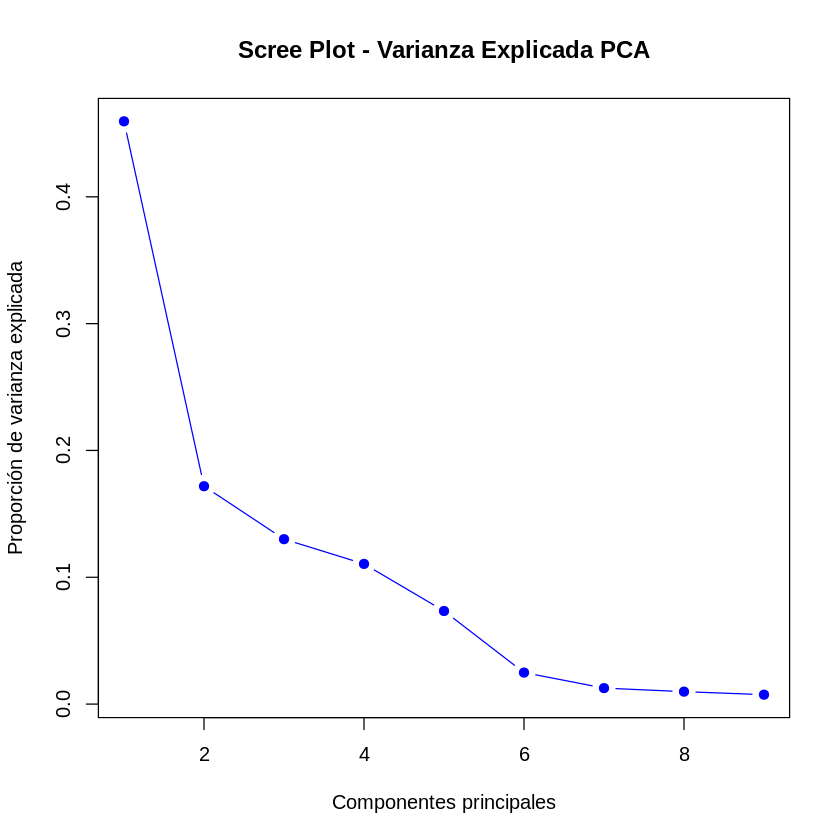

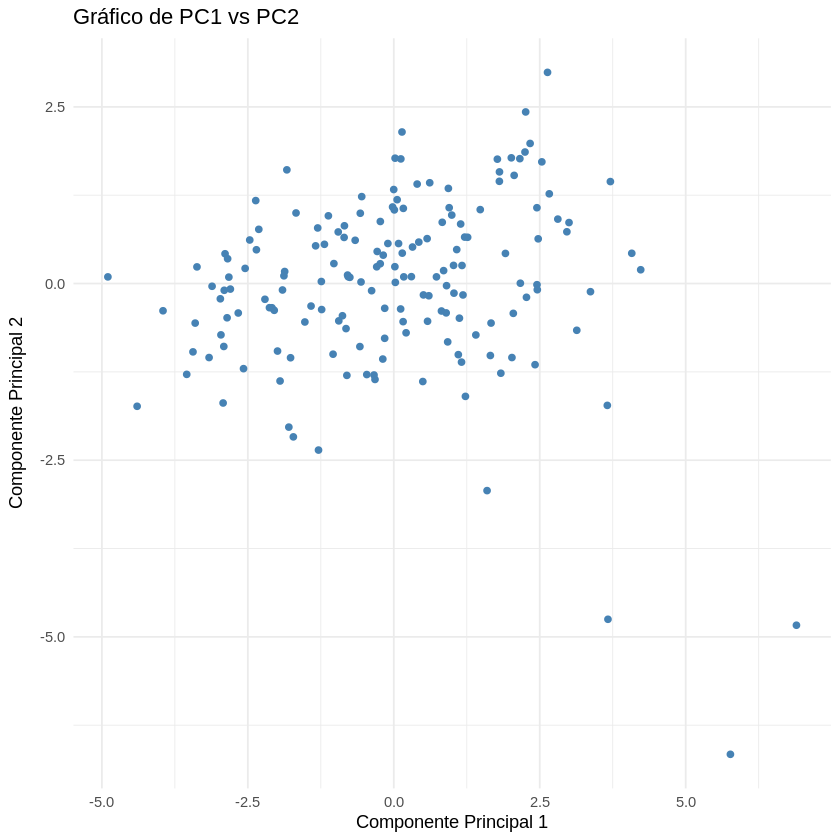

In [ ]:
# ==========================================
# 5. APLICACIÓN DE PCA (MÁXIMO 3 COMPONENTES)
# ==========================================

# 5.1 Ejecutar PCA con datos estandarizados
pca_model <- prcomp(df_scaled, center = TRUE, scale. = TRUE)

# 5.2 Resumen del PCA (varianza explicada)
summary(pca_model)

# 5.3 Cargas (opcional pero útil)
pca_model$rotation

# 5.4 Scree plot / gráfico de varianza explicada
var_exp <- pca_model$sdev^2
var_exp_prop <- var_exp / sum(var_exp)

plot(var_exp_prop, type = "b", pch = 19, col = "blue",
     xlab = "Componentes principales",
     ylab = "Proporción de varianza explicada",
     main = "Scree Plot - Varianza Explicada PCA")

# 5.5 Selección de hasta 3 componentes principales
# Basado en criterios de clases: acumulado >= 70% y máximo 3 PCs
pca_summary <- summary(pca_model)
pca_summary$importance[2, ]   # proporción por componente
pca_summary$importance[3, ]   # varianza acumulada

# 5.6 Obtener componentes principales
pca_data <- as.data.frame(pca_model$x[, 1:3])   # PC1, PC2, PC3

# 5.7 Gráfico PC1 vs PC2
library(ggplot2)

ggplot(pca_data, aes(x = PC1, y = PC2)) +
  geom_point(color = "steelblue") +
  theme_minimal() +
  labs(title = "Gráfico de PC1 vs PC2",
       x = "Componente Principal 1",
       y = "Componente Principal 2")


# Aplicación de PCA

Para reducir la dimensionalidad y facilitar la identificación de patrones entre países, aplicamos un Análisis de Componentes Principales (PCA) utilizando las nueve variables numéricas estandarizadas. Este método permite concentrar gran parte de la variabilidad del dataset en un conjunto reducido de componentes independientes y más interpretables.

### 5.1 Varianza explicada

El PCA mostró una estructura clara en la contribución de las primeras componentes:

* PC1 explica el 45,9% de la variabilidad total.

* PC2 aporta un 17,1% adicional.

* PC3 contribuye con un 13,0%.

En conjunto, las tres primeras componentes explican cerca del 76% de la varianza acumulada, valor que se aproxima al criterio del 80% utilizado en clase y justifica trabajar únicamente con estas tres. El Scree Plot refuerza esta decisión al mostrar una caída marcada entre PC1 y PC3, tras la cual las componentes restantes agregan muy poca información relevante.

### 5.2 Interpretación de las Componentes Principales

La interpretación se basa en las cargas (loadings), que indican el peso de cada variable dentro de cada componente.

#####**PC1 – Nivel socioeconómico general**

Presenta cargas positivas en income, gdpp y life_expec, y negativas en child_mort y total_fer.
Refleja un eje de desarrollo:

* Valores altos → países con altos ingresos, mayor esperanza de vida y baja mortalidad infantil.

* Valores bajos → países con menor desarrollo y condiciones de vida más vulnerables.


#####**PC2 – Apertura comercial**

Fuertemente influida por exports e imports.
Representa el grado de integración económica internacional:

* Valores altos → economías más abiertas y orientadas al comercio exterior.

* Valores bajos → países con menor participación en mercados globales.


#####**PC3 – Perfil demográfico y salud**

Caracterizada por cargas altas en health e inflation, y negativas en income.
Diferencia países según:

  * nivel de gasto en salud,

* comportamiento inflacionario,

* y dinámicas demográficas asociadas.


### 5.3 Gráfico PC1 vs PC2

La visualización en el plano formado por PC1 y PC2 permite observar la distribución general de los países en los dos ejes principales. Aunque no se distinguen grupos completamente aislados, sí se aprecian tendencias claras:

* Países desarrollados se concentran hacia la derecha (PC1 alto).

* Países con mayor apertura comercial se ubican más arriba (PC2 alto).

Este plano será fundamental para interpretar la formación de clusters en etapas posteriores.

En sintesis, el PCA permitió condensar la información de las nueve variables originales en tres componentes que mantienen más del 75% de la varianza total, cumpliendo los criterios del curso y proporcionando una base sólida para aplicar técnicas de clustering como K-Means.

[1] 1494.0000 1043.9258  826.4458  696.1294  616.2249  547.1515  492.3574
 [8]  447.7372  418.0831  390.2545

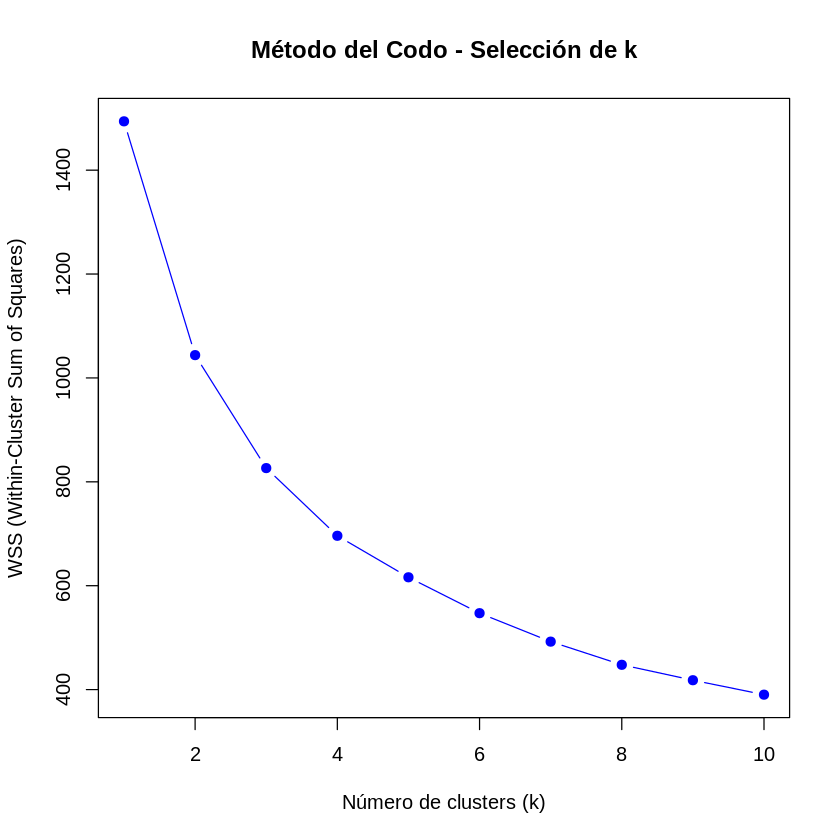

In [ ]:
# ==========================================
# 6. MÉTODO DEL CODO (WSS k = 1 a 10)
# ==========================================

# Utilizaremos SOLO los datos estandarizados
data_for_clustering <- df_scaled

# 6.1 Calcular WSS para k = 1 a 10
set.seed(123)   # para reproducibilidad
wss <- c()

for(k in 1:10){
  km <- kmeans(data_for_clustering, centers = k, nstart = 20)
  wss[k] <- km$tot.withinss
}

# 6.2 Graficar el método del codo
plot(1:10, wss, type = "b", pch = 19, col = "blue",
     xlab = "Número de clusters (k)",
     ylab = "WSS (Within-Cluster Sum of Squares)",
     main = "Método del Codo - Selección de k")

# 6.3 Mostrar valores de WSS (opcional)
wss



#### 6. MÉTODO DEL CODO (WSS k = 1 a 10)
Para determinar el número adecuado de clusters, aplicamos el método del codo calculando el Within-Cluster Sum of Squares (WSS) para valores de k entre 1 y 10. El WSS permite evaluar qué tan compactos son los grupos: valores más bajos indican clusters más cohesionados.

Al observar el gráfico resultante, se aprecia una disminución pronunciada del WSS entre k = 1 y k = 3. Sin embargo, a partir de ese punto la curva comienza a aplanarse, lo que indica que agregar más clusters ya no mejora de manera significativa la compactación de los grupos.

Ese cambio de pendiente corresponde al “codo” del gráfico, y en este caso aparece claramente en k = 3. Este valor representa el equilibrio entre simplicidad del modelo y capacidad de agrupación, tal como sugiere la metodología revisada en clases.

En consecuencia, el número óptimo de clusters seleccionado es k = 3, ya que es el punto a partir del cual aumentar el número de grupos no aporta beneficios relevantes al modelo.

In [ ]:
# ==========================================
# 7. ENTRENAMIENTO DEL MODELO DE CLUSTERING
# ==========================================

# Elegir el valor de k según método del codo
k_opt <- 3   # Puedes modificar este número si decides otro k

# 7.1 Entrenar el modelo K-Means
set.seed(123)  # reproducibilidad
km_model <- kmeans(df_scaled, centers = k_opt, nstart = 25)

# 7.2 Revisar resultados del modelo
km_model

# 7.3 Agregar columna 'cluster' al dataset original (sin escalar)
df$cluster <- as.factor(km_model$cluster)

# 7.4 Mostrar los primeros registros con cluster asignado
head(df)

# 7.5 (Opcional) Mostrar los centroides del modelo
km_model$centers


K-means clustering with 3 clusters of sizes 36, 84, 47

Cluster means:
  child_mort     exports     health     imports     income   inflation
1 -0.8249676  0.64314557  0.7252301  0.19006732  1.4797922 -0.48346661
2 -0.4052346 -0.03155768 -0.2237978  0.02408916 -0.2510155 -0.01711594
3  1.3561391 -0.43622118 -0.1555163 -0.18863644 -0.6848344  0.40090504
  life_expec  total_fer       gdpp
1  1.0763414 -0.7895024  1.6111498
2  0.2539698 -0.4230704 -0.3534185
3 -1.2783352  1.3608511 -0.6024306

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   2   2   3   2   2   2   1   1   2   2   1   2   2   2   1   2   3   2   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   3   2   1   2   3   3   2   3   1   2   3   3   2   2   2   3   3   3   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  3   2   1   1   1   2   2   2   2   3   3   2   2   1   1   3   3   2   1   3 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
6,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,-0.8249676,0.64314557,0.7252301,0.19006732,1.4797922,-0.48346661,1.0763414,-0.7895024,1.6111498
2,-0.4052346,-0.03155768,-0.2237978,0.02408916,-0.2510155,-0.01711594,0.2539698,-0.4230704,-0.3534185
3,1.3561391,-0.43622118,-0.1555163,-0.18863644,-0.6848344,0.40090504,-1.2783352,1.3608511,-0.6024306


### Entrenamiento del modelo de clustering (K-Means)

Tras seleccionar k = 3 mediante el método del codo, entrenamos el modelo K-Means utilizando los datos estandarizados. El algoritmo agrupó a los países según su similitud en los indicadores socioeconómicos y de salud, permitiendo identificar tres perfiles bien diferenciados.

Los centroides del modelo reflejan claramente las características de cada grupo:

* Cluster 1: baja mortalidad infantil y fertilidad, junto con altos niveles de ingreso y esperanza de vida. Representa a los países con mejores condiciones de desarrollo.

* Cluster 2: valores cercanos a cero en la mayoría de las variables, lo que sugiere un grupo intermedio tanto en desarrollo como en resultados socioeconómicos.

* Cluster 3: alta mortalidad infantil y fertilidad, junto con ingresos y esperanza de vida más bajos. Agrupa a los países más vulnerables dentro del conjunto analizado.

Los valores de WSS por cluster son similares, lo que indica una estructura relativamente equilibrada. Finalmente, incorporamos la columna cluster al dataset, permitiendo relacionar directamente cada grupo con los países reales para el análisis posterior.

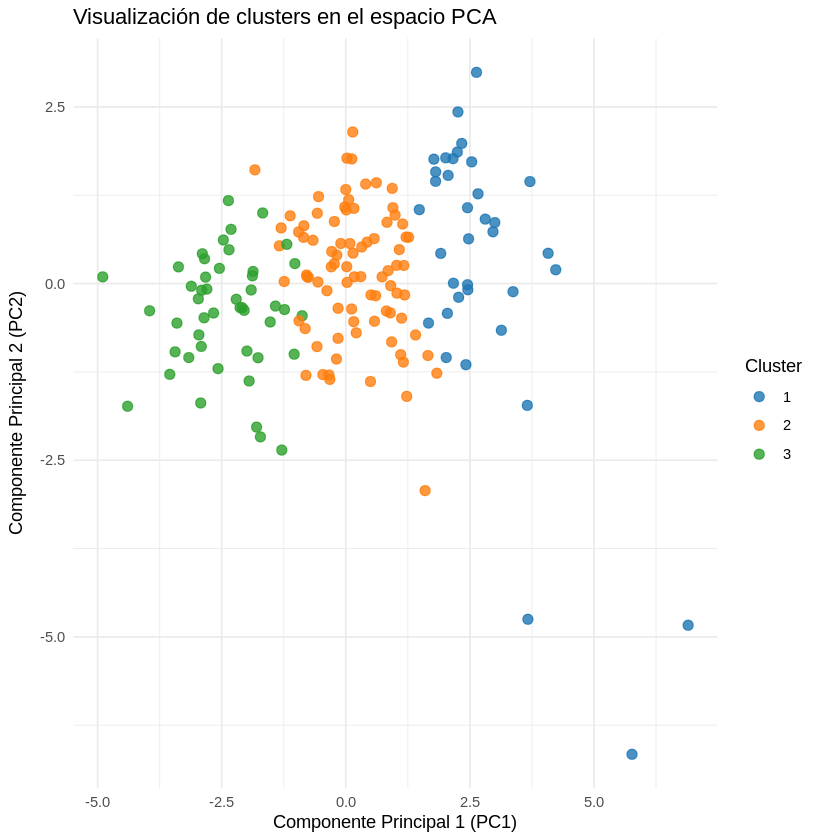

In [ ]:
# ==========================================
# 8. VISUALIZACIÓN DE LOS CLUSTERS
# ==========================================

# 8.1 Tomar los componentes principales (PC1 y PC2)
pca_scores <- as.data.frame(pca_model$x[, 1:2])   # PC1 y PC2

# Agregar la columna cluster desde el dataset original (df)
pca_scores$cluster <- df$cluster

# 8.2 Gráfico de dispersión PC1 vs PC2 coloreado por cluster
library(ggplot2)

ggplot(pca_scores, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 2.5, alpha = 0.8) +
  theme_minimal() +
  labs(title = "Visualización de clusters en el espacio PCA",
       x = "Componente Principal 1 (PC1)",
       y = "Componente Principal 2 (PC2)",
       color = "Cluster") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c"))


# Visualización de los clusters

La representación de los países en el plano formado por PC1 y PC2, coloreados según su cluster, permite observar con mayor claridad cómo quedaron distribuidos los grupos. Si bien no existe una separación totalmente rígida, sí se aprecian zonas bien definidas donde cada cluster tiende a concentrarse.

* Cluster azul: corresponde a países con mejores indicadores, como mayores ingresos y mayor esperanza de vida.

* Cluster naranja: agrupa países con condiciones intermedias.

* Cluster verde: reúne países con indicadores más débiles y mayores niveles de vulnerabilidad.

In [ ]:
# ==========================================
# 9. CARACTERIZACIÓN DE LOS CLUSTERS
# Usar las variables ORIGINALES, no las PCs
# ==========================================

# 9.1 Seleccionar solo variables numéricas originales + cluster
df_analysis <- df[, c("child_mort", "exports", "health", "imports",
                      "income", "inflation", "life_expec",
                      "total_fer", "gdpp", "cluster")]

# 9.2 Medias por cluster (patrón general)
library(dplyr)

cluster_means <- df_analysis %>%
  group_by(cluster) %>%
  summarise(across(everything(), mean, na.rm = TRUE))

cluster_means

# 9.3 Rangos por cluster (para entender dispersión)
cluster_ranges <- df_analysis %>%
  group_by(cluster) %>%
  summarise(across(where(is.numeric),
                   list(min = ~min(.), max = ~max(.)),
                   .names = "{.col}_{.fn}"))

cluster_ranges

# 9.4 Cantidad de países por cluster (tamaño del grupo)
table(df$cluster)

# 9.5 Extra: tabla descriptiva completa por cluster (opcional)
cluster_summary <- df_analysis %>%
  group_by(cluster) %>%
  summarise(across(where(is.numeric),
                   list(mean = mean, sd = sd),
                   na.rm = TRUE))

cluster_summary


cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.00000,58.73889,8.807778,51.49167,45672.222,2.671250,80.12778,1.752778,42494.444
2,21.92738,40.24392,6.200952,47.47340,12305.595,7.600905,72.81429,2.307500,6486.452
3,92.96170,29.15128,6.388511,42.32340,3942.404,12.019681,59.18723,5.008085,1922.383


cluster,child_mort_min,child_mort_max,exports_min,exports_max,health_min,health_max,imports_min,imports_max,income_min,income_max,inflation_min,inflation_max,life_expec_min,life_expec_max,total_fer_min,total_fer_max,gdpp_min,gdpp_max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2.6,10.8,12.400,200.0,1.81,17.9,13.6000,174,25200,125000,-3.220,16.7,75.5,82.8,1.15,3.03,16600,105000
2,4.5,64.4,0.109,93.8,1.97,14.2,0.0659,108,1780,45400,-4.210,45.9,61.7,80.4,1.25,4.34,592,28000
3,36.9,208.0,2.200,85.8,2.20,13.1,17.2000,101,609,33700,0.885,104.0,32.1,71.1,2.59,7.49,231,17100



 1  2  3 
36 84 47 

cluster,child_mort_mean,child_mort_sd,exports_mean,exports_sd,health_mean,health_sd,imports_mean,imports_sd,income_mean,income_sd,inflation_mean,inflation_sd,life_expec_mean,life_expec_sd,total_fer_mean,total_fer_sd,gdpp_mean,gdpp_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.00000,2.188933,58.73889,41.93078,8.807778,3.178015,51.49167,36.84400,45672.222,20852.018,2.671250,4.077719,80.12778,1.815742,1.752778,0.3730539,42494.444,18991.080
2,21.92738,13.757919,40.24392,19.02918,6.200952,2.167233,47.47340,20.10387,12305.595,8180.074,7.600905,7.849516,72.81429,3.960745,2.307500,0.6969570,6486.452,5021.434
3,92.96170,33.375229,29.15128,18.16060,6.388511,2.662015,42.32340,17.73274,3942.404,5641.790,12.019681,15.509958,59.18723,6.443521,5.008085,1.0413821,1922.383,2956.104


### Caracterización de los clusters con variables originales

Al analizar nuevamente las variables reales del dataset, se evidencia que los tres clusters representan niveles socioeconómicos claramente diferenciados.

**Cluster 1 – Países con mejores condiciones**

Este grupo muestra los indicadores más favorables: mortalidad infantil muy baja, ingresos altos, mayor esperanza de vida, baja fertilidad e inflación contenida. Corresponde principalmente a economías desarrolladas y con alta calidad de vida.

**Cluster 2 – Economías intermedias**

Presenta valores moderados en casi todas las variables: mortalidad infantil media, ingresos intermedios, esperanza de vida cercana a los 73 años y fertilidad alrededor de 2,3 hijos. Agrupa países en desarrollo que han avanzado, pero aún mantienen brechas importantes.

**Cluster 3 – Países más vulnerables**

Reúne las condiciones más críticas: elevada mortalidad infantil, ingresos muy bajos, menor esperanza de vida, alta fertilidad e inflación más elevada. Representa a los países con mayores desafíos socioeconómicos y necesidades prioritarias.


## 10. Estrategias

Los tres clusters identificados representan niveles de desarrollo muy distintos, por lo que sus necesidades y prioridades también varían. En consecuencia, las estrategias deben adaptarse a la realidad económica de cada grupo.

**Cluster 1 – Economías desarrolladas y de alto ingreso**

Perfil: baja mortalidad infantil, altos ingresos, alta esperanza de vida y baja inflación. Son economías estables con mercados maduros.

Estrategias recomendadas:

* Oferta de bienes y servicios de alto valor agregado (tecnología, innovación, servicios financieros).

* Enfoque en calidad, diferenciación y sostenibilidad.

* Inversiones de largo plazo y alianzas estratégicas, aprovechando su estabilidad.

* Expansión de servicios premium y experiencias de consumo.

**Cluster 2 – Economías en desarrollo intermedio**

Perfil: ingresos moderados, indicadores sociales medios y potencial de crecimiento.

* Estrategias recomendadas:

* Productos con buena relación precio–calidad.

* Opciones de financiamiento accesible (microcréditos, leasing).

* Foco en sectores en expansión: educación, salud, infraestructura, telecomunicaciones.

* Estrategias de penetración de mercado para posicionarse antes de la competencia.

**Cluster 3 – Economías vulnerables y de bajo ingreso**

Perfil: alta mortalidad infantil, bajos ingresos, alta fertilidad, menor esperanza de vida y mayor inflación.

Estrategias recomendadas:

* Soluciones de bajo costo y alta accesibilidad.

* Programas de apoyo y cooperación orientados a salud, educación y nutrición.

* Alianzas con gobiernos, ONG y organismos internacionales.

* Priorizar bienes esenciales antes que productos premium o de alta tecnología.


### Conclusion General

Las estrategias varían según el nivel de desarrollo identificado:

* Cluster 1 prioriza calidad y sofisticación.

* Cluster 2 necesita equilibrio entre precio y valor, con foco en crecimiento económico.

* Cluster 3 requiere accesibilidad, apoyo estructural y productos orientados a necesidades básicas.

Este enfoque permite tomar decisiones económicas más precisas, segmentando los países según su realidad y dirigiendo los recursos donde pueden generar mayor impacto o retorno.

[1] 0.2832958

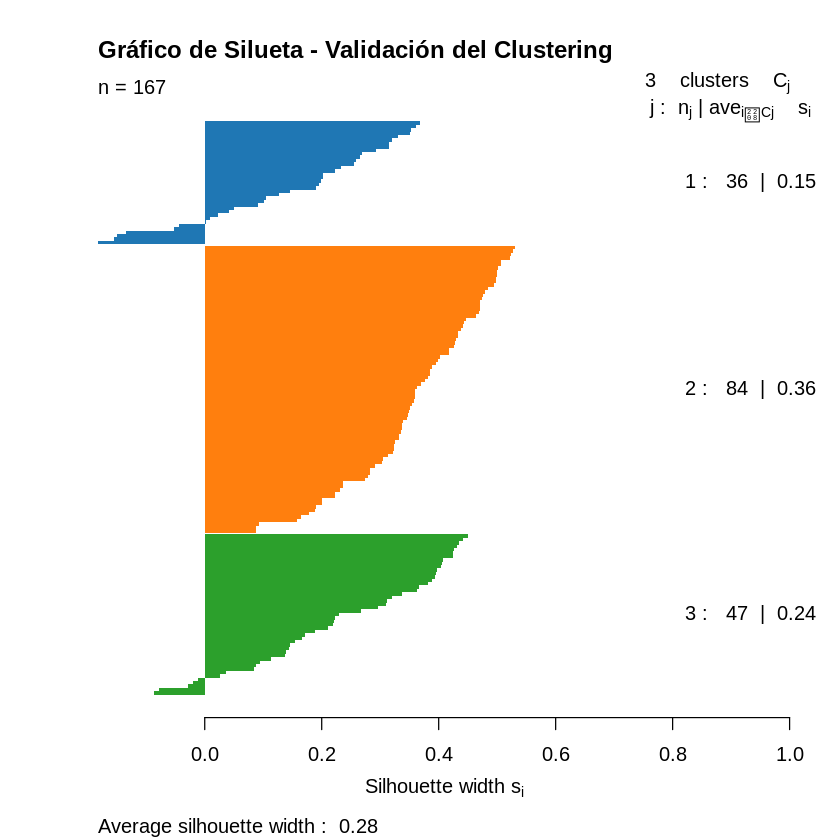

In [ ]:
# ==========================================
# 11. VALIDACIÓN DEL MODELO: SILHOUETTE SCORE
# ==========================================

library(cluster)

# 11.1 Calcular las distancias (métrica usada en clases: Euclidiana)
dist_matrix <- dist(df_scaled, method = "euclidean")

# 11.2 Calcular silueta del modelo K-Means entrenado
sil <- silhouette(km_model$cluster, dist_matrix)

# 11.3 Mostrar el índice de silueta promedio
mean_silhouette <- mean(sil[, 3])
mean_silhouette

# 11.4 Gráfico de la silueta
plot(sil,
     border = NA,
     col = c("#1f77b4", "#ff7f0e", "#2ca02c"),
     main = "Gráfico de Silueta - Validación del Clustering")


## Validación del modelo mediante Silhouette Score

Para evaluar la calidad del agrupamiento obtenido con K-Means, se calculó el Silhouette Score, indicador que mide simultáneamente:

* Cohesión interna: similitud entre los países dentro de un mismo cluster.

* Separación externa: distancia entre cada país y los clusters a los que no pertenece.

El valor promedio obtenido fue aproximadamente 0.28, lo que corresponde a un nivel de calidad moderado. Si bien no refleja una separación completamente definida, sí indica que existe una estructura reconocible en los datos, coherente con la naturaleza gradual de los indicadores socioeconómicos.

**Resultados por cluster**

* Cluster 1 – Silueta ≈ 0.15
Es el grupo con menor cohesión. Varios países se ubican relativamente cerca de los límites entre clusters, por lo que su asignación no resulta del todo precisa.

* Cluster 2 – Silueta ≈ 0.36
Es el cluster más sólido. Presenta la mejor combinación de cohesión y separación, lo que indica que los países de este grupo comparten características similares y están mejor diferenciados de los otros dos.

* Cluster 3 – Silueta ≈ 0.24
Exhibe una cohesión aceptable, aunque menor que la del cluster 2. La separación existe, pero es menos nítida.

**Interpretación general**

Los resultados permiten concluir que:

* Existe cierta separación visual y estadística entre los grupos, aunque con solapamientos moderados.

* La elección de k = 3 sigue siendo razonable: el modelo no es fuerte, pero sí suficientemente estructurado para análisis exploratorio.

* El clustering permite distinguir tendencias económicas amplias, más que divisiones estrictamente delimitadas.

En síntesis, el Silhouette Score confirma que el modelo de tres clusters es adecuado para describir patrones generales entre los países, siempre entendiendo estos grupos como segmentaciones orientativas basadas en características socioeconómicas comunes.